In [ ]:
#neccessay depencies 
 !pip install tensorflow pandas numpy scikit-learn matplotlib --quiet

Step 1: Import Libraries

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

Step 2: Load Dataset




In [5]:
import pandas as pd

df = pd.read_csv("/content/IMDB Dataset.csv", on_bad_lines='skip')


In [6]:
print("✅ Dataset Loaded Successfully!")
print("Shape:", df.shape)
print(df.head())

✅ Dataset Loaded Successfully!
Shape: (50000, 2)
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


Step 3: Encode Sentiment Labels

In [7]:
if df['sentiment'].dtype == 'object':
    encoder = LabelEncoder()
    df['sentiment'] = encoder.fit_transform(df['sentiment'])  # positive=1, negative=0

num_classes = df['sentiment'].nunique()
print(f"\nNumber of Sentiment Classes: {num_classes}")
print("Class Mapping:", dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))


Number of Sentiment Classes: 2
Class Mapping: {'negative': np.int64(0), 'positive': np.int64(1)}


Step 4: Split Data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    df['review'], df['sentiment'], test_size=0.2, random_state=42, stratify=df['sentiment']
)

Step 5: Tokenization & Padding

In [9]:
vocab_size = 10000
maxlen = 200

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen, padding='post', truncating='post')

Build ANN Model

In [10]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # binary classification
])

Step 7: Compile Model

In [11]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Step 8: Train Model

In [12]:
history = model.fit(
    X_train_pad, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 25s 46ms/step - accuracy: 0.6972 - loss: 0.5332 - val_accuracy: 0.8649 - val_loss: 0.3157
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.9512 - loss: 0.1439 - val_accuracy: 0.8434 - val_loss: 0.4384
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.9923 - loss: 0.0244 - val_accuracy: 0.8393 - val_loss: 0.7226
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 23s 47ms/step - accuracy: 0.9964 - loss: 0.0116 - val_accuracy: 0.8478 - val_loss: 0.8415
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.9941 - loss: 0.0175 - val_accuracy: 0.8432 - val_loss: 0.7788


Step 9: Evaluate Model

In [14]:
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"\n✅ Test Accuracy: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8386 - loss: 0.8319

✅ Test Accuracy: 0.8403


Step 10: Plot Accuracy and Loss

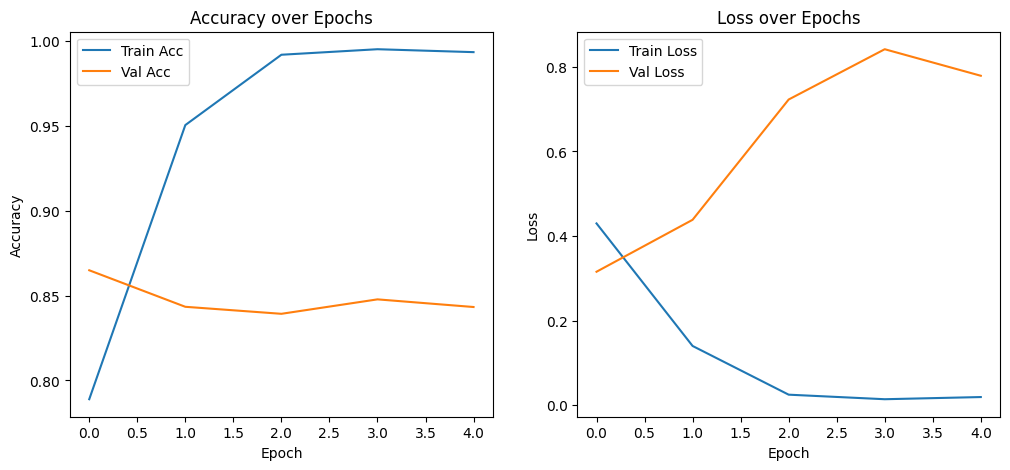

In [15]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Adding INNOVATIVE PART of Sentiment Confidence Scoring

In [16]:
sample_reviews = [
    "I absolutely loved this movie, great performance!",
    "It was a waste of time, very boring plot.",
    "The product is okay, nothing special.",
    "Terrible quality, will not recommend.",
    "Amazing experience, I’ll watch again!"
]

sample_seq = tokenizer.texts_to_sequences(sample_reviews)
sample_pad = pad_sequences(sample_seq, maxlen=maxlen, padding='post', truncating='post')

Predict Sentiments

In [17]:
preds = model.predict(sample_pad)
pred_classes = (preds > 0.5).astype(int).flatten()
pred_confidence = preds.flatten() * 100  # convert to %

print("\n🧩 Sample Predictions with Confidence Score:")
for review, pred, conf in zip(sample_reviews, pred_classes, pred_confidence):
    sentiment_label = encoder.inverse_transform([pred])[0]
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {sentiment_label}")
    print(f"Confidence: {conf:.2f}%\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step

🧩 Sample Predictions with Confidence Score:
Review: I absolutely loved this movie, great performance!
Predicted Sentiment: positive
Confidence: 99.86%

Review: It was a waste of time, very boring plot.
Predicted Sentiment: negative
Confidence: 0.04%

Review: The product is okay, nothing special.
Predicted Sentiment: negative
Confidence: 1.18%

Review: Terrible quality, will not recommend.
Predicted Sentiment: negative
Confidence: 14.82%

Review: Amazing experience, I’ll watch again!
Predicted Sentiment: positive
Confidence: 98.36%



Step 11: Save ANN Model

In [18]:
model.save("imdb_sentiment_ann_innovative.h5")
print("💾 Model saved as imdb_sentiment_ann_innovative.h5")

💾 Model saved as imdb_sentiment_ann_innovative.h5
